Question 4 [Marks 80]

Student Attendance Dashboard for Decision Making. You will be given a
Google Sheet with different sheets holding data of different classes. Create
a dashboard showing a summary of what's happening across different classes. Which students need attention for missing sessions? Whichstudents are unsatisfied? Which students are very satisfied? <Date>
Column shows attendance. R-<Date> Column shows the rating by the
candidate. Extra marks for identifying more useful insights. Missing values
of the Type column can be treated as STUDENT. This data gets updated on
a daily basis. The latest data gets injected in early columns. Your code
shouldn't need any changes to deal with the latest data. Please note:
Visualisation is mandatory. You will receive 0 marks if you do not add
visualisation.

Data Link -
https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing data sets of Classes
# Class-1 Data:
df_cls1 = pd.read_csv("D:\Desktop\Ds exam\Attendance Data - Class 1.csv")

# Class-2 Data:
df_cls2 = pd.read_csv("D:\Desktop\Ds exam\Attendance Data - Class 2.csv")

In [ ]:
df_cls1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,7,Missed,9,Missed,9,Missed,8,...,Missed,9,Missed,6,Missed,7,Missed,5,Missed,10
1,2,NaN,Missed,9,Missed,9,Missed,8,Attended,7,...,Attended,8,Attended,5,Missed,5,Attended,6,Missed,10
2,3,STUDENT,Missed,8,Missed,10,Missed,10,Missed,6,...,Attended,10,Missed,10,Missed,6,Attended,7,Attended,5
3,4,STUDENT,Missed,10,Missed,10,Attended,10,Missed,5,...,Missed,10,Attended,8,Attended,5,Attended,6,Attended,8
4,5,WORKING,Missed,6,Missed,5,Missed,5,Missed,10,...,Missed,6,Missed,8,Missed,7,Missed,6,Missed,9


In [ ]:
# COlumns of Class1
df_cls1.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [ ]:
# Info, column type
df_cls1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student Roll Num  57 non-null     int64 
 1   Type              32 non-null     object
 2   10-01-21          57 non-null     object
 3   R-10-01-21        57 non-null     int64 
 4   09-01-21          57 non-null     object
 5   R-9-01-21         57 non-null     int64 
 6   08-01-21          57 non-null     object
 7   R-8-01-21         57 non-null     int64 
 8   07-01-21          56 non-null     object
 9   R-7-01-21         57 non-null     int64 
 10  06-01-21          56 non-null     object
 11  R-6-01-21         57 non-null     int64 
 12  05-01-21          56 non-null     object
 13  R-5-01-21         57 non-null     int64 
 14  04-01-21          56 non-null     object
 15  R-4-01-21         57 non-null     int64 
 16  03-01-21          56 non-null     object
 17  R-3-01-21         

In [ ]:
df_cls1.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21,R-02-01-21,R-01-01-21
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,29.000000,7.894737,7.754386,7.263158,7.333333,7.508772,7.614035,7.912281,7.456140,7.210526,7.894737
std,16.598193,1.728792,1.550123,1.653204,1.776165,1.604934,1.611946,1.745205,1.648269,1.819898,1.739091
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,15.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,29.000000,8.000000,8.000000,7.000000,7.000000,7.000000,8.000000,8.000000,7.000000,7.000000,8.000000
75%,43.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,9.000000
max,57.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df_cls1.isna().sum()

Student Roll Num     0
Type                25
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             1
R-7-01-21            0
06-01-21             1
R-6-01-21            0
05-01-21             1
R-5-01-21            0
04-01-21             1
R-4-01-21            0
03-01-21             1
R-3-01-21            0
02-01-21             1
R-02-01-21           0
01-01-21             1
R-01-01-21           0
dtype: int64

Filling missing values with mode because the date is categorical

In [ ]:
df1_fill = df_cls1["07-01-21"].mode()[0]
df_cls1["07-01-21"] = df_cls1["07-01-21"].fillna(df1_fill)

In [ ]:
df2_fill = df_cls1["06-01-21"].mode()[0]
df_cls1["06-01-21"] = df_cls1["06-01-21"].fillna(df2_fill)

In [ ]:
df3_fill = df_cls1["05-01-21"].mode()[0]
df_cls1["05-01-21"] = df_cls1["05-01-21"].fillna(df3_fill)

In [ ]:
df4_fill = df_cls1["04-01-21"].mode()[0]
df_cls1["04-01-21"] = df_cls1["04-01-21"].fillna(df4_fill)

In [ ]:
df5_fill = df_cls1["03-01-21"].mode()[0]
df_cls1["03-01-21"] = df_cls1["03-01-21"].fillna(df5_fill)

In [ ]:
df6_fill = df_cls1["02-01-21"].mode()[0]
df_cls1["02-01-21"] = df_cls1["02-01-21"].fillna(df6_fill)

In [ ]:
df7_fill = df_cls1["01-01-21"].mode()[0]
df_cls1["01-01-21"] = df_cls1["01-01-21"].fillna(df7_fill)

In [ ]:
df_cls1.isna().sum()

Student Roll Num     0
Type                25
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             0
R-7-01-21            0
06-01-21             0
R-6-01-21            0
05-01-21             0
R-5-01-21            0
04-01-21             0
R-4-01-21            0
03-01-21             0
R-3-01-21            0
02-01-21             0
R-02-01-21           0
01-01-21             0
R-01-01-21           0
dtype: int64

In [ ]:
df_cls1["Type"].head()

0    WORKING
1        NaN
2    STUDENT
3    STUDENT
4    WORKING
Name: Type, dtype: object

In [ ]:
df_fill = df_cls1["Type"].mode()[0]
df_cls1["Type"] = df_cls1["Type"].fillna(df_fill)

In [ ]:
df_cls1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,7,Missed,9,Missed,9,Missed,8,...,Missed,9,Missed,6,Missed,7,Missed,5,Missed,10
1,2,STUDENT,Missed,9,Missed,9,Missed,8,Attended,7,...,Attended,8,Attended,5,Missed,5,Attended,6,Missed,10
2,3,STUDENT,Missed,8,Missed,10,Missed,10,Missed,6,...,Attended,10,Missed,10,Missed,6,Attended,7,Attended,5
3,4,STUDENT,Missed,10,Missed,10,Attended,10,Missed,5,...,Missed,10,Attended,8,Attended,5,Attended,6,Attended,8
4,5,WORKING,Missed,6,Missed,5,Missed,5,Missed,10,...,Missed,6,Missed,8,Missed,7,Missed,6,Missed,9


EDA on class-2 data set

In [ ]:
df_cls2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,8,Attended,9,Attended,10,Attended,10,...,Attended,9,Attended,9,Missed,7,NaN,NaN,NaN,NaN
1,2,NaN,Attended,8,Attended,7,Attended,8,Attended,10,...,Attended,8,Attended,9,Attended,7,NaN,NaN,NaN,NaN
2,3,STUDENT,Missed,7,Missed,10,Missed,7,Missed,6,...,Missed,9,Missed,8,Missed,10,NaN,NaN,NaN,NaN
3,4,NaN,Attended,8,Attended,8,Attended,8,Attended,7,...,Missed,10,Attended,5,Attended,7,NaN,NaN,NaN,NaN
4,5,WORKING,Attended,9,Attended,7,Attended,8,Missed,9,...,Missed,5,Missed,7,Missed,6,NaN,NaN,NaN,NaN


In [ ]:
df_cls2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student Roll Num  70 non-null     int64  
 1   Type              30 non-null     object 
 2   10-01-21          70 non-null     object 
 3   R-10-01-21        70 non-null     int64  
 4   09-01-21          70 non-null     object 
 5   R-9-01-21         70 non-null     int64  
 6   08-01-21          70 non-null     object 
 7   R-8-01-21         70 non-null     int64  
 8   07-01-21          69 non-null     object 
 9   R-7-01-21         70 non-null     int64  
 10  06-01-21          69 non-null     object 
 11  R-6-01-21         70 non-null     int64  
 12  05-01-21          69 non-null     object 
 13  R-5-01-21         70 non-null     int64  
 14  04-01-21          69 non-null     object 
 15  R-4-01-21         70 non-null     int64  
 16  03-01-21          67 non-null     object 
 17 

In [ ]:
# df_cls2.drop(["01-01-21","R-01-01-21"], axis=1, inplace=True)

In [ ]:
df_cls2.isna().sum()

Student Roll Num     0
Type                40
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             1
R-7-01-21            0
06-01-21             1
R-6-01-21            0
05-01-21             1
R-5-01-21            0
04-01-21             1
R-4-01-21            0
03-01-21             3
R-3-01-21            0
02-01-21            70
R-02-01-21          70
01-01-21            70
R-01-01-21          70
dtype: int64

In [ ]:
df2_fill1 = df_cls2["07-01-21"].mode()[0]
df_cls2["07-01-21"] = df_cls2["07-01-21"].fillna(df2_fill1)

df2_fill2 = df_cls2["06-01-21"].mode()[0]
df_cls2["06-01-21"] = df_cls2["06-01-21"].fillna(df2_fill2)

df2_fill3 = df_cls2["05-01-21"].mode()[0]
df_cls2["05-01-21"] = df_cls2["05-01-21"].fillna(df2_fill3)

df2_fill4 = df_cls2["04-01-21"].mode()[0]
df_cls2["04-01-21"] = df_cls2["04-01-21"].fillna(df2_fill4)

df2_fill5 = df_cls2["03-01-21"].mode()[0]
df_cls2["03-01-21"] = df_cls2["03-01-21"].fillna(df2_fill5)

In [ ]:
df_cls2.isna().sum()

Student Roll Num     0
Type                40
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             0
R-7-01-21            0
06-01-21             0
R-6-01-21            0
05-01-21             0
R-5-01-21            0
04-01-21             0
R-4-01-21            0
03-01-21             0
R-3-01-21            0
02-01-21            70
R-02-01-21          70
01-01-21            70
R-01-01-21          70
dtype: int64

In [ ]:
df_cls2.shape

(70, 22)

In [ ]:
fil2 = df_cls2["Type"].mode()[0]
df_cls2["Type"] = df_cls2["Type"].fillna(fil2)

In [ ]:
df_cls2.isna().sum()

Student Roll Num     0
Type                 0
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             0
R-7-01-21            0
06-01-21             0
R-6-01-21            0
05-01-21             0
R-5-01-21            0
04-01-21             0
R-4-01-21            0
03-01-21             0
R-3-01-21            0
02-01-21            70
R-02-01-21          70
01-01-21            70
R-01-01-21          70
dtype: int64

## Merging Two class CSV files for easy visualization

In [ ]:
df_cls1.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [ ]:
df = pd.concat([df_cls1, df_cls2])

In [ ]:
df.shape

(127, 22)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isna().sum()

Student Roll Num    0
Type                0
10-01-21            0
R-10-01-21          0
09-01-21            0
R-9-01-21           0
08-01-21            0
R-8-01-21           0
07-01-21            0
R-7-01-21           0
06-01-21            0
R-6-01-21           0
05-01-21            0
R-5-01-21           0
04-01-21            0
R-4-01-21           0
03-01-21            0
R-3-01-21           0
02-01-21            0
R-02-01-21          0
01-01-21            0
R-01-01-21          0
dtype: int64

In [ ]:
df.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

## Visualizing the Data set

In [ ]:
# Calculate the attendance count and missed count for each type
df['Attended_Count'] = df[df == 'Attended'].count(axis=1)
df['Missed_Count'] = df[df == 'Missed'].count(axis=1)

# Calculate the total sessions for each type
df['Total_Sessions'] = df[['Attended_Count', 'Missed_Count']].sum(axis=1)

# Calculate the attendance percentage and missed percentage for each type
df['Attended_Percentage'] = (df['Attended_Count'] / df['Total_Sessions']) * 100
df['Missed_Percentage'] = (df['Missed_Count'] / df['Total_Sessions']) * 100

In [ ]:
df.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21,Attended_Count,Missed_Count,Total_Sessions,Attended_Percentage,Missed_Percentage
0,1,WORKING,Missed,7,Missed,9,Missed,9,Missed,8,...,7,Missed,5.0,Missed,10.0,0,10,10,0.0,100.0
1,2,STUDENT,Missed,9,Missed,9,Missed,8,Attended,7,...,5,Attended,6.0,Missed,10.0,4,6,10,40.0,60.0
2,3,STUDENT,Missed,8,Missed,10,Missed,10,Missed,6,...,6,Attended,7.0,Attended,5.0,4,6,10,40.0,60.0
3,4,STUDENT,Missed,10,Missed,10,Attended,10,Missed,5,...,5,Attended,6.0,Attended,8.0,5,5,10,50.0,50.0
4,5,WORKING,Missed,6,Missed,5,Missed,5,Missed,10,...,7,Missed,6.0,Missed,9.0,0,10,10,0.0,100.0


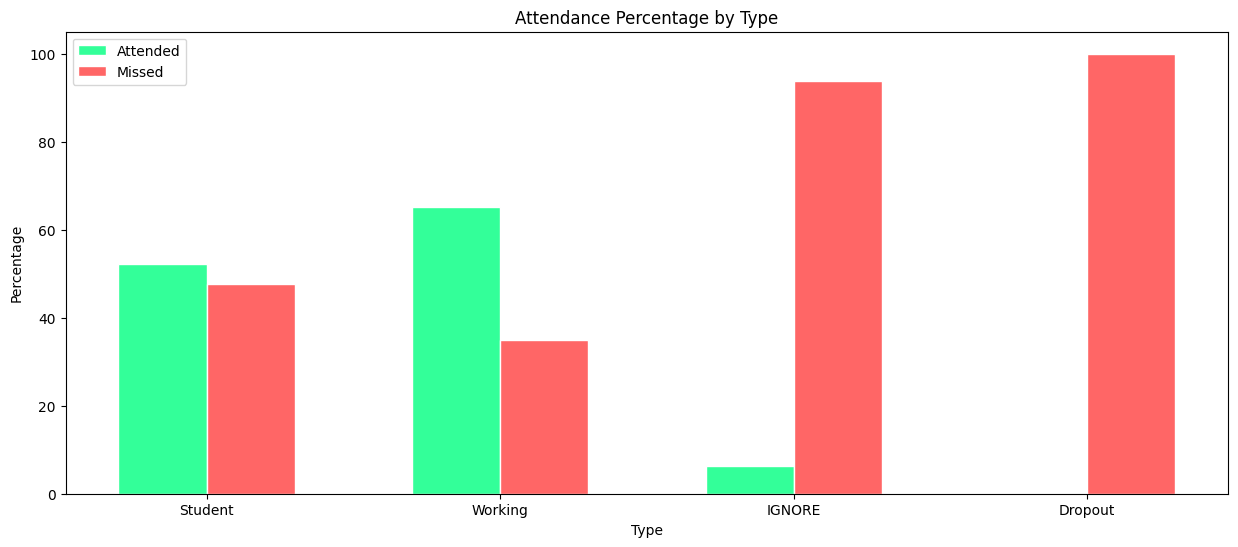

In [ ]:
student_data = df[df['Type'] == 'STUDENT']
working_data = df[df['Type'] == 'WORKING']
ignore_data = df[df['Type'] == 'IGNORE']
dropout_data = df[df['Type'] == 'DROPOUT']

# Prepare data for plotting
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#33FF99', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#FF6666', width=bar_width, edgecolor='white', label='Missed')

# Add labels, title, and legend
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
# Show the plot
plt.show()


1. From above polt we can observe that Ignore, Dropout, Students are missing the sessions.
2. Apart from Dropout and Ignore, student and Working are attending classes more.
3. Students are almost equally attending and missing the classes need more focus on students.
4. Also Need to find the problem why ignore people are not attending calsses.

In [ ]:
df.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21,Attended_Count,Missed_Count,Total_Sessions,Attended_Percentage,Missed_Percentage
0,1,WORKING,Missed,7,Missed,9,Missed,9,Missed,8,...,7,Missed,5.0,Missed,10.0,0,10,10,0.0,100.0
1,2,STUDENT,Missed,9,Missed,9,Missed,8,Attended,7,...,5,Attended,6.0,Missed,10.0,4,6,10,40.0,60.0
2,3,STUDENT,Missed,8,Missed,10,Missed,10,Missed,6,...,6,Attended,7.0,Attended,5.0,4,6,10,40.0,60.0
3,4,STUDENT,Missed,10,Missed,10,Attended,10,Missed,5,...,5,Attended,6.0,Attended,8.0,5,5,10,50.0,50.0
4,5,WORKING,Missed,6,Missed,5,Missed,5,Missed,10,...,7,Missed,6.0,Missed,9.0,0,10,10,0.0,100.0


In [ ]:
df.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21', 'Attended_Count', 'Missed_Count',
       'Total_Sessions', 'Attended_Percentage', 'Missed_Percentage'],
      dtype='object')

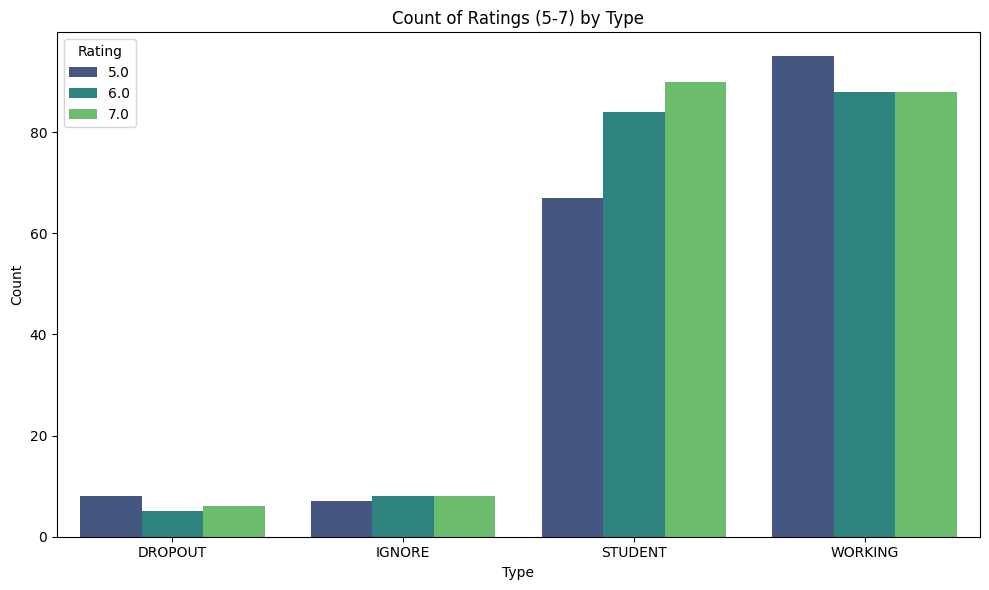

In [ ]:
student_ratings = df[df['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = df[df['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = df[df['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = df[df['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 7)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='viridis')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-7) by Type')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()


### Highly unsatisfied people are working people.
1. Above plot shows the 5-7 range ratings given by type of people.
2. Above image shows that very Low rating(5) was given by working people.
3. Followed by Students given low ratings.
4. This also shows that dropout students are not satisfied because they have given low (5) ratings.


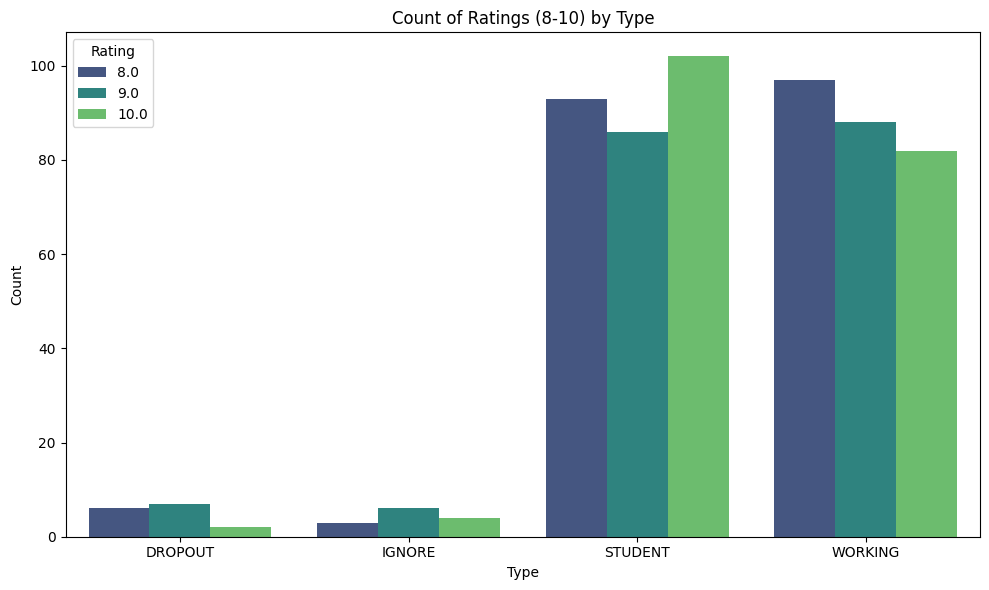

In [ ]:
# Concatenate the ratings and create a new dataframe
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 8) & (df_ratings['Rating'] <= 10)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='viridis')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (8-10) by Type')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()


### Highly Satisfied people are Students.
1. Above plot image shows the ratings range 8-10.
2. Highest rating 10 was highly given by students followed by working people.

# We can check individual class perfomance and ratings

### Visualizing the class-1 and class-2 ratings

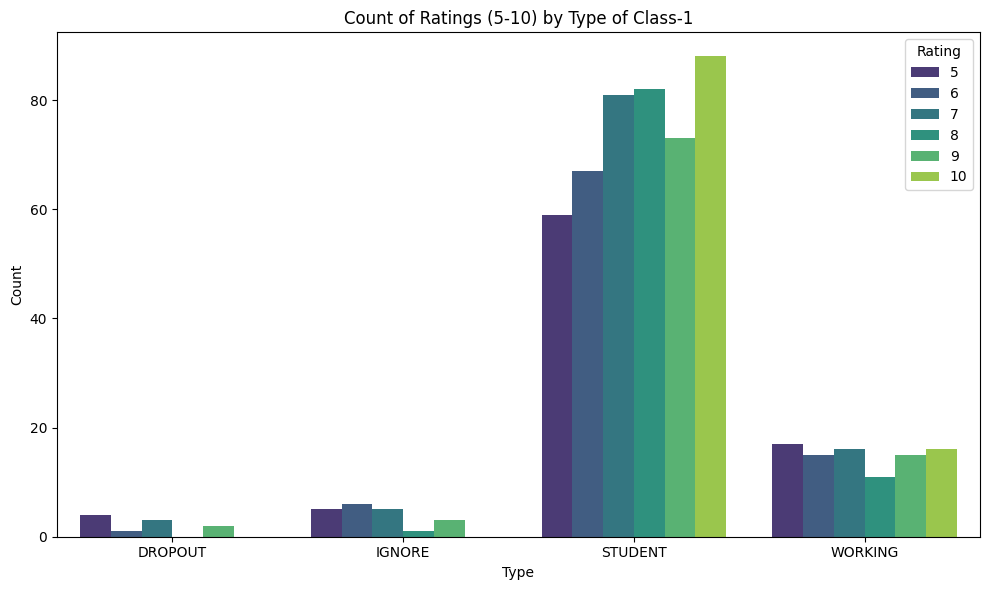

In [ ]:
student_ratings = df_cls1[df_cls1['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = df_cls1[df_cls1['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = df_cls1[df_cls1['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = df_cls1[df_cls1['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 10)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='viridis')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-10) by Type of Class-1')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

1. In class-1 Highest satisfied people are Students and they have given highest 10 rating.
2. Also Lowest 5 ratings are highly given by students only followed by working people.

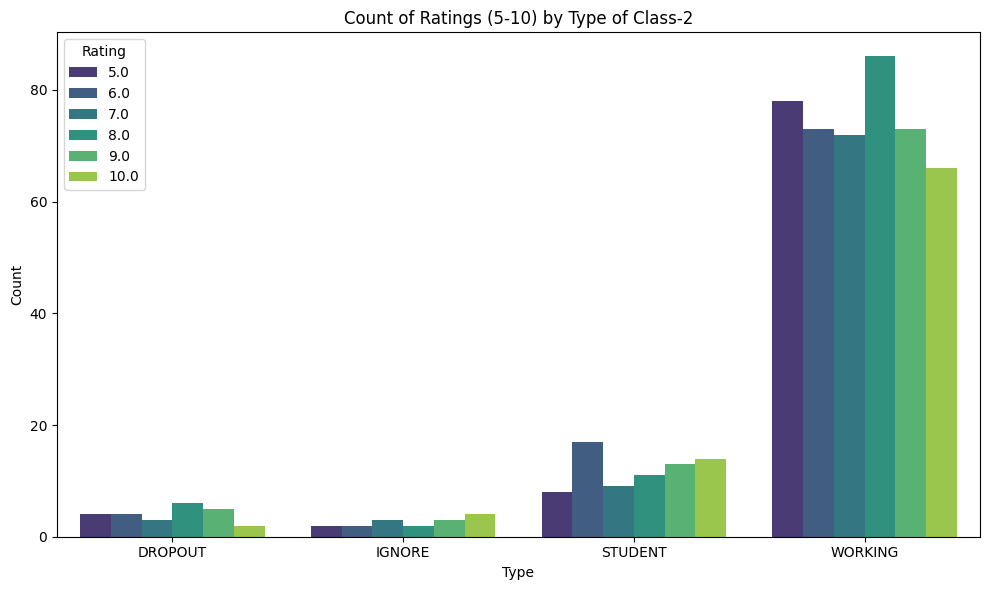

In [ ]:
student_ratings = df_cls2[df_cls2['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = df_cls2[df_cls2['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = df_cls2[df_cls2['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = df_cls2[df_cls2['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 10)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='viridis')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-10) by Type of Class-2')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

1. In class-2 Working people are high but they are unsatisfied due to they have given high 5 ratings.
2. High 10 ratings are also given by woorking people only.
3. But students in class-2 also unsatisfied because they have given high 7 ratings.

### Conclusion:
1. In both classes we have seen mixed ratings.
2. In class-1 highest people are students and in class-2 highest people are working.

## Visualizing the attendence of both classes.

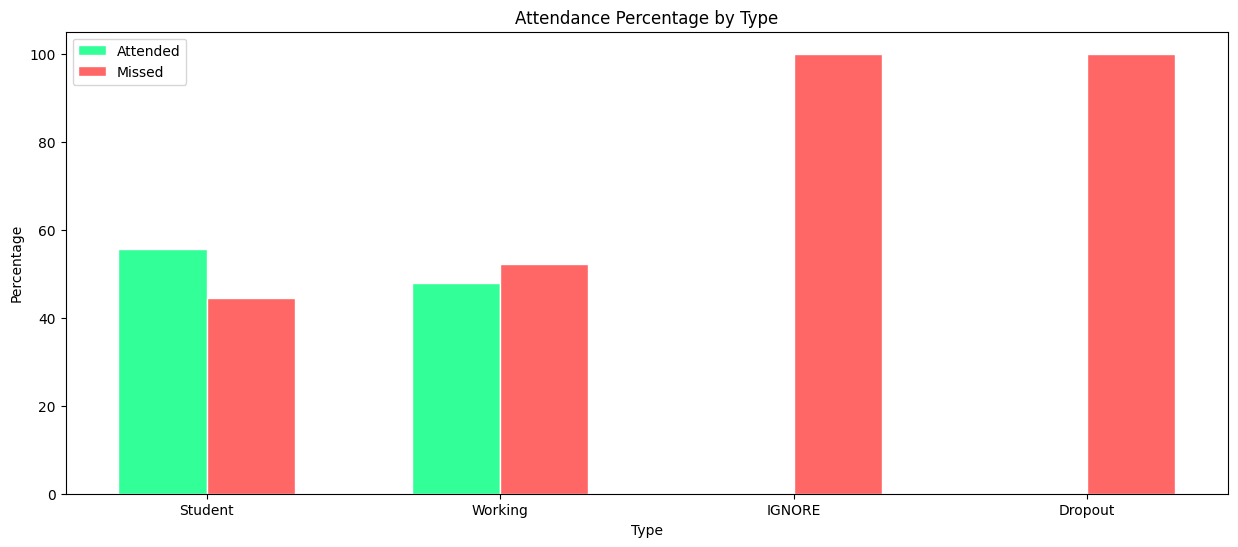

In [ ]:
# Calculate the attendance count and missed count for each type
df_cls1['Attended_Count'] = df_cls1[df_cls1 == 'Attended'].count(axis=1)
df_cls1['Missed_Count'] = df_cls1[df_cls1 == 'Missed'].count(axis=1)

# Calculate the total sessions for each type
df_cls1['Total_Sessions'] = df_cls1[['Attended_Count', 'Missed_Count']].sum(axis=1)

# Calculate the attendance percentage and missed percentage for each type
df_cls1['Attended_Percentage'] = (df_cls1['Attended_Count'] / df_cls1['Total_Sessions']) * 100
df_cls1['Missed_Percentage'] = (df_cls1['Missed_Count'] / df_cls1['Total_Sessions']) * 100

student_data = df_cls1[df_cls1['Type'] == 'STUDENT']
working_data = df_cls1[df_cls1['Type'] == 'WORKING']
ignore_data = df_cls1[df_cls1['Type'] == 'IGNORE']
dropout_data = df_cls1[df_cls1['Type'] == 'DROPOUT']

# Prepare data for plotting
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#33FF99', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#FF6666', width=bar_width, edgecolor='white', label='Missed')

# Add labels, title, and legend
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
# Show the plot
plt.show()


1. In class-1 working people are missing class regularly.
2. Followed by students.
3. Highest attendence seen in students.

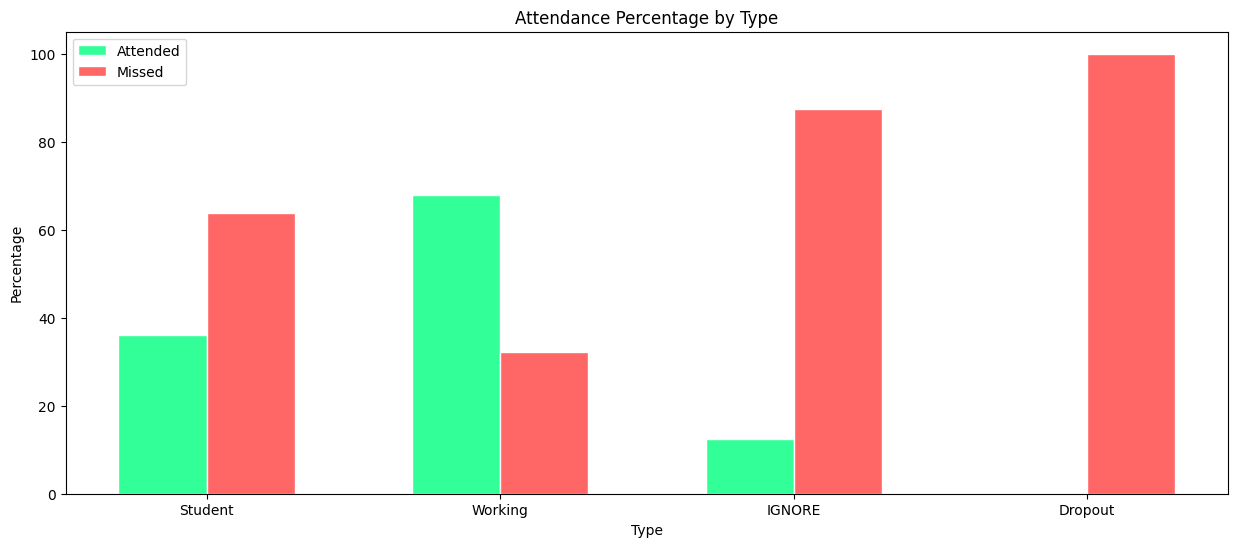

In [ ]:
# Calculate the attendance count and missed count for each type
df_cls2['Attended_Count'] = df_cls2[df_cls2 == 'Attended'].count(axis=1)
df_cls2['Missed_Count'] = df_cls2[df_cls2 == 'Missed'].count(axis=1)

# Calculate the total sessions for each type
df_cls2['Total_Sessions'] = df_cls2[['Attended_Count', 'Missed_Count']].sum(axis=1)

# Calculate the attendance percentage and missed percentage for each type
df_cls2['Attended_Percentage'] = (df_cls2['Attended_Count'] / df_cls2['Total_Sessions']) * 100
df_cls2['Missed_Percentage'] = (df_cls2['Missed_Count'] / df_cls2['Total_Sessions']) * 100

student_data = df_cls2[df_cls2['Type'] == 'STUDENT']
working_data = df_cls2[df_cls2['Type'] == 'WORKING']
ignore_data = df_cls2[df_cls2['Type'] == 'IGNORE']
dropout_data = df_cls2[df_cls2['Type'] == 'DROPOUT']

# Prepare data for plotting
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#33FF99', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#FF6666', width=bar_width, edgecolor='white', label='Missed')

# Add labels, title, and legend
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
# Show the plot
plt.show()

1. In class-2 highest attendence is maintained by working and followed by students.
2. Students are missing classes regularly in class-2.

### Conclusion:
1. I have observed that in both classes dropouts and ignoring people are high.
2. Also students and working people in both classes are ignoring major classes.
3. Need to focus on students and working people to increase high attendence